# How to convolve in fourier domain

### How to convolve and 400x400 image with 3x3 filter in fourier domain as the fourier transform has different shape 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread
# from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
import glob


## To convolve a 400x400 image with a 3x3 filter in the Fourier domain, you'll need to follow these steps:

1. Pad the image: First, you need to pad the image and the filter to the desired size. In this case, you can pad the 400x400 image to a larger size, such as 402x402 or 404x404, to ensure that the Fourier transforms have the same shape. You can use zero-padding for the extra pixels.

2. Compute the Fourier transforms: Take the Fourier transform of the padded image and the filter using a Fast Fourier Transform (FFT) algorithm. The Fourier transform of the image will give you a 2D complex array representing the image's frequency components, and the Fourier transform of the filter will give you a 2D complex array representing the filter's frequency response.

3. Multiply the Fourier transforms: Perform element-wise multiplication of the Fourier transform of the image and the Fourier transform of the filter. This multiplication is equivalent to convolution in the spatial domain.

4. Inverse Fourier transform: Apply the inverse Fourier transform (using an inverse FFT) to the result of the multiplication. This will give you the convolved image in the spatial domain.

5. Crop the image: Since you padded the image in step 1, you'll need to crop the convolved image back to the original size (400x400) to remove the extra padded pixels.


Note that in this example, the padding sizes were chosen to ensure compatibility between the shapes of the Fourier transforms. Adjust the padding and cropping accordingly based on the dimensions of your specific image and filter.

(402, 402) (402, 402)


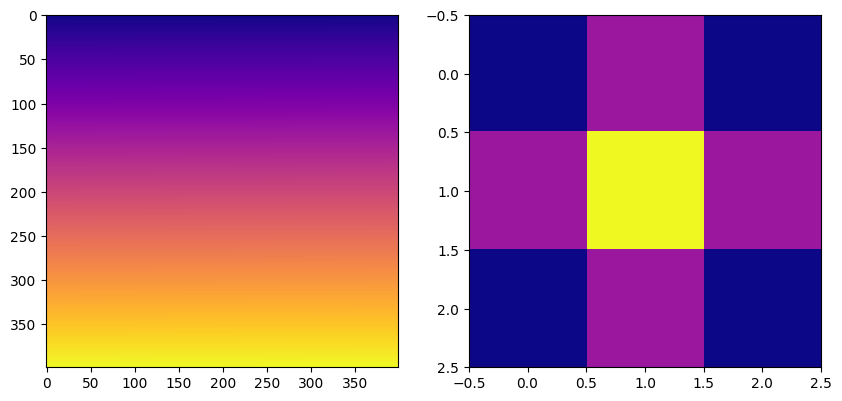

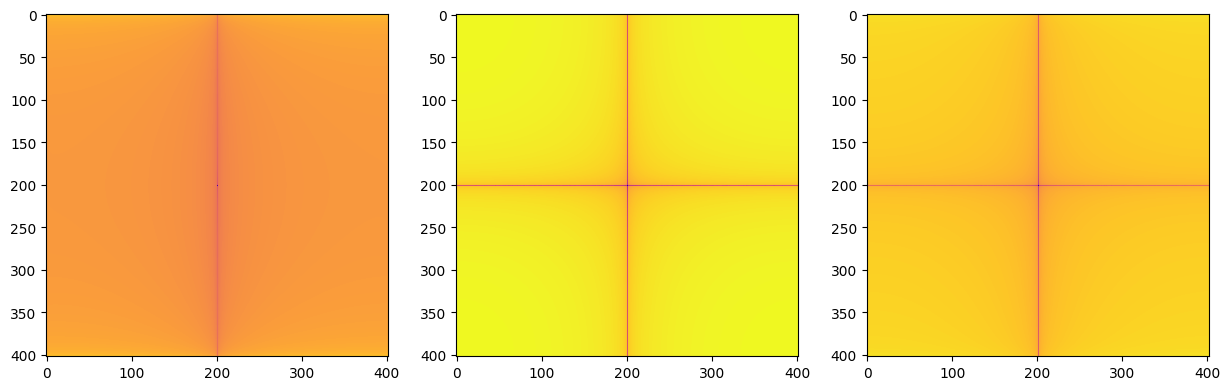

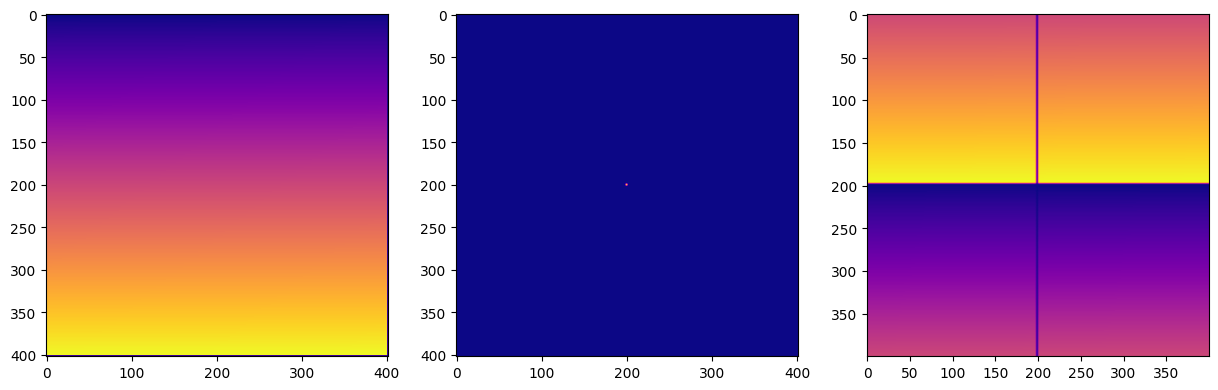

In [28]:
import numpy as np
from numpy.fft import fft2, ifft2

# Assuming image is a 400x400 numpy array and filter is a 3x3 numpy array
# filter=np.array([1,1,1,0,0,0,-1,-1,-1]).reshape(3,3)
filter=np.array([1,2,1,2,4,2,1,2,1]).reshape(3,3)
image=np.arange(0,400*400).reshape(400,400)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ffig,fax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(image,cmap="plasma")
ax[1].imshow(filter,cmap="plasma")

# Pad the image and filter
padded_image = np.pad(image, [(1, 1), (1, 1)], mode='constant')
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(padded_image,cmap="plasma")
padded_filter = np.pad(filter, [(199, 200), (199, 200)], mode='constant')
ax[1].imshow(padded_filter,cmap="plasma")
print(padded_image.shape,padded_filter.shape)
# Compute Fourier transforms
image_fft = fft2(padded_image)
filter_fft = fft2(padded_filter)
fax[0].imshow(np.log10(np.abs(image_fft)),cmap="plasma")
fax[1].imshow(np.log10(np.abs(filter_fft)),cmap="plasma")

# Multiply Fourier transforms
result_fft = image_fft*filter_fft
fax[2].imshow(np.log10(np.abs(result_fft)),cmap="plasma")

# Inverse Fourier transform
result = np.real(ifft2(result_fft))

# Crop the image to the original size
convolved_image = result[1:401, 1:401]
ax[2].imshow(convolved_image,cmap="plasma")

## There is some error in this code that result is shown in wrong quardant
### How to solve this issue is using fftshift and ifftshift

If the convolved image appears split and parts are appearing in the wrong quadrant, it could be due to a mismatch in the indexing convention used by the Fourier transform implementation you are using. Some implementations may reorder the quadrants of the Fourier transform.

To fix this issue, you can apply a quadrant shift operation to rearrange the quadrants back to their correct positions. The quadrant shift operation involves swapping the quadrants of the image so that the zero-frequency component is centered.

Here's an updated version of the code that includes the quadrant shift operation:

```python
import numpy as np
from scipy.fft import fft2, ifft2, fftshift, ifftshift

# Assuming image is a 400x400 numpy array and filter is a 3x3 numpy array

# Pad the image and filter
padded_image = np.pad(image, [(1, 1), (1, 1)], mode='constant')
padded_filter = np.pad(filter, [(198, 199), (198, 199)], mode='constant')

# Compute Fourier transforms
image_fft = fftshift(fft2(ifftshift(padded_image)))
filter_fft = fftshift(fft2(ifftshift(padded_filter)))

# Multiply Fourier transforms
result_fft = image_fft * filter_fft

# Inverse Fourier transform
result = np.real(ifftshift(ifft2(fftshift(result_fft))))

# Crop the image to the original size
convolved_image = result[1:401, 1:401]
```

In this updated code, the `fftshift` and `ifftshift` functions are used to perform the quadrant shift operations before and after the Fourier transform operations, respectively. This will ensure that the correct quadrant configuration is maintained throughout the process.

Try running this modified code, and the convolved image should be correctly aligned without any split parts or misplaced quadrants.

(402, 402) (402, 402)


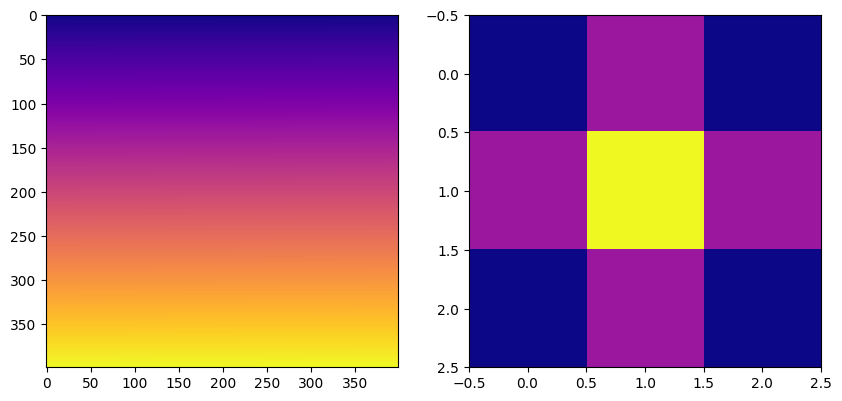

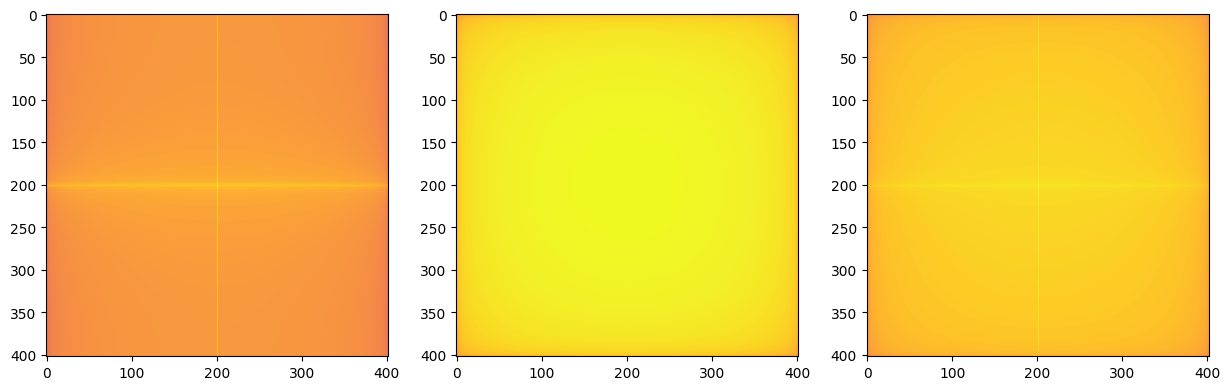

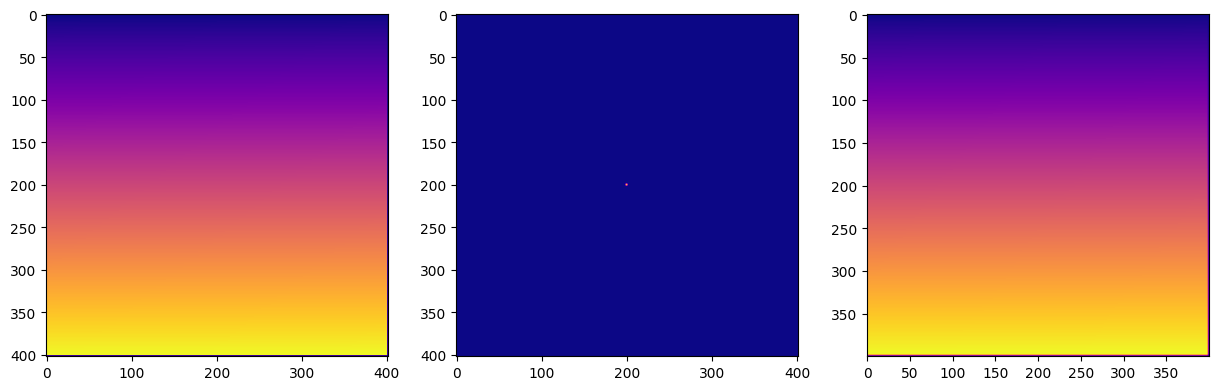

In [37]:
import numpy as np
from numpy.fft import fft2, ifft2,ifftshift,fftshift

# Assuming image is a 400x400 numpy array and filter is a 3x3 numpy array
# filter=np.array([1,1,1,0,0,0,-1,-1,-1]).reshape(3,3)
filter=np.array([1,2,1,2,4,2,1,2,1]).reshape(3,3)
image=np.arange(0,400*400).reshape(400,400)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ffig,fax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(image,cmap="plasma")
ax[1].imshow(filter,cmap="plasma")

# Pad the image and filter
padded_image = np.pad(image, [(1, 1), (1, 1)], mode='constant')
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(padded_image,cmap="plasma")
padded_filter = np.pad(filter, [(199, 200), (199, 200)], mode='constant')
ax[1].imshow(padded_filter,cmap="plasma")
print(padded_image.shape,padded_filter.shape)


# # Compute Fourier transforms
# image_fft = fft2(padded_image)
# filter_fft = fft2(padded_filter)

# Compute Fourier transforms
image_fft = fftshift(fft2(ifftshift(padded_image)))
filter_fft = fftshift(fft2(ifftshift(padded_filter)))


fax[0].imshow(np.log10(np.abs(image_fft)),cmap="plasma")
fax[1].imshow(np.log10(np.abs(filter_fft)),cmap="plasma")

# Multiply Fourier transforms
result_fft = image_fft*filter_fft
fax[2].imshow(np.log10(np.abs(result_fft)),cmap="plasma")

# # Inverse Fourier transform
# result = np.real(ifft2(result_fft))

# Inverse Fourier transform
result = np.real(ifftshift(ifft2(fftshift(result_fft))))

# Crop the image to the original size
convolved_image = result[1:401, 1:401]
ax[2].imshow(convolved_image,cmap="plasma")

(402, 402) (402, 402)


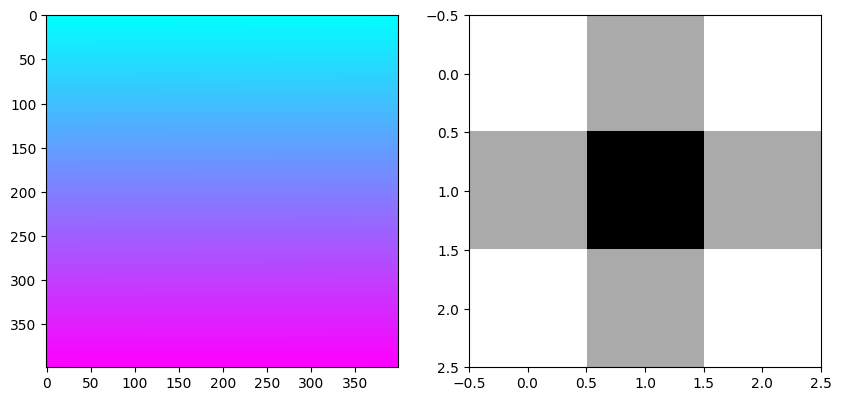

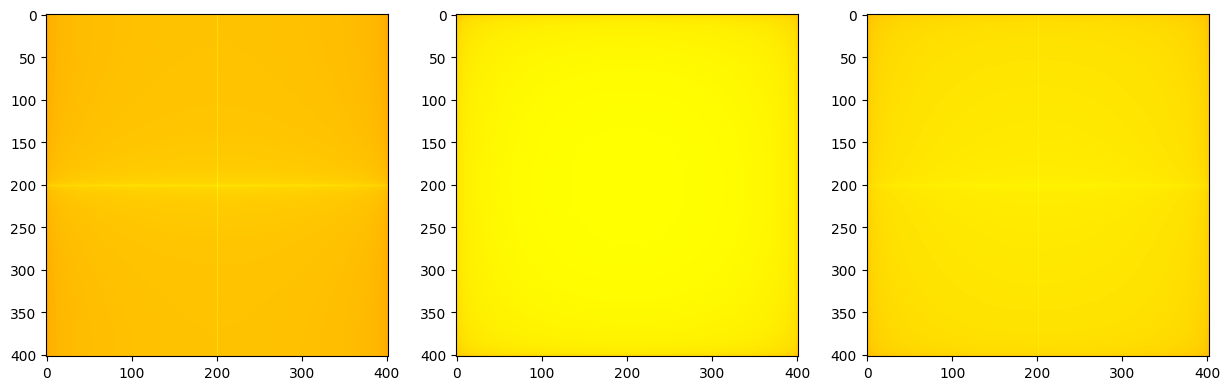

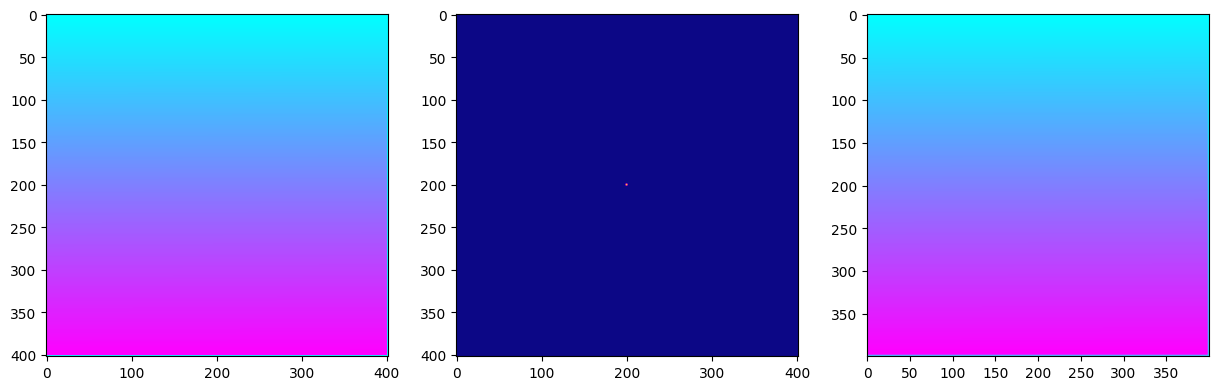

In [39]:
import numpy as np
from numpy.fft import fft2, ifft2,ifftshift,fftshift

# Assuming image is a 400x400 numpy array and filter is a 3x3 numpy array
# filter=np.array([1,1,1,0,0,0,-1,-1,-1]).reshape(3,3)
filter=np.array([1,2,1,2,4,2,1,2,1]).reshape(3,3)
image=np.arange(0,400*400).reshape(400,400)
fig,ax=plt.subplots(1,2,figsize=(10,5))
ffig,fax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(image,cmap="cool")
ax[1].imshow(filter,cmap="binary")

# Pad the image and filter
padded_image = np.pad(image, [(1, 1), (1, 1)], mode='constant')
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(padded_image,cmap="cool")
padded_filter = np.pad(filter, [(199, 200), (199, 200)], mode='constant')
ax[1].imshow(padded_filter,cmap="plasma")
print(padded_image.shape,padded_filter.shape)


# # Compute Fourier transforms
# image_fft = fft2(padded_image)
# filter_fft = fft2(padded_filter)

# Compute Fourier transforms
image_fft = fftshift(fft2(ifftshift(padded_image)))
filter_fft = fftshift(fft2(ifftshift(padded_filter)))


fax[0].imshow(np.log10(np.abs(image_fft)),cmap="autumn")
fax[1].imshow(np.log10(np.abs(filter_fft)),cmap="autumn")

# Multiply Fourier transforms
result_fft = image_fft*filter_fft
fax[2].imshow(np.log10(np.abs(result_fft)),cmap="autumn")

# # Inverse Fourier transform
# result = np.real(ifftshift(ifft2(result_fft)))

# Inverse Fourier transform
result = np.real(ifftshift(ifft2(fftshift(result_fft))))

# Crop the image to the original size
convolved_image = result[1:401, 1:401]
ax[2].imshow(convolved_image,cmap="cool")

# Why is fftshift and ifftshift required

The `fftshift` and `ifftshift` functions are used to handle the shifting of the frequency components in the Fourier domain. They are necessary because the default output of the Fourier transform is arranged such that the zero frequency is located at the top-left corner of the transformed image.

In the context of convolution and the Fourier domain, the use of `fftshift` and `ifftshift` ensures that the frequency components are correctly aligned before and after the Fourier transform operations, respectively. Here's why they are required:

1. `fftshift`: The `fftshift` function is used to shift the frequency components of the image before taking the Fourier transform. This is necessary because, by default, the output of the Fourier transform places the zero frequency at the top-left corner of the transformed image. However, in order to correctly apply convolution in the frequency domain, the zero frequency should be at the center of the transformed image. `fftshift` reorders the frequency components so that the zero frequency is at the center.

2. `ifftshift`: The `ifftshift` function is used to reverse the shift applied by `fftshift` after performing the inverse Fourier transform. It ensures that the frequency components are properly aligned before the inverse transform. Without `ifftshift`, the resulting image after inverse Fourier transform would be shifted and may not correspond to the correct spatial representation.

By applying `fftshift` before the forward Fourier transform and `ifftshift` after the inverse Fourier transform, you ensure that the frequency components are correctly aligned and that the resulting image is in the spatial domain with the correct quadrant configuration.

Therefore, `fftshift` and `ifftshift` are important steps in the convolution process in the Fourier domain to ensure the accuracy and proper alignment of the frequency components.